In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import model_from_json

In [26]:
train_features=[]
train_target=[]
test_features=[]
test_target=[]
for i in range(0,7):
    TrainImageNameList=os.listdir("D:/Datasets/Emotions/train" + "/" + str(i))
    TestImageNameList=os.listdir("D:/Datasets/Emotions/test" + "/" + str(i))
    for y in TrainImageNameList:
        TrainImgarr=cv2.imread("D:/Datasets/Emotions/train" + "/" + str(i) + "/" + y)
        try:
            Imgarr=cv2.resize(TrainImgarr,(48,48))
        except:
            pass
        else:
            train_features.append(TrainImgarr)
            train_target.append(i)
    for y in TestImageNameList:
        TestImgarr=cv2.imread("D:/Datasets/Emotions/test" + "/" + str(i) + "/" + y)
        try:
            Imgarr=cv2.resize(TestImgarr,(48,48))
        except:
            pass
        else:
            test_features.append(TestImgarr)
            test_target.append(i)

In [27]:
train_features=np.array(train_features)
train_target=np.array(train_target)
test_features=np.array(test_features)
test_target=np.array(test_target)

In [4]:
train_features.shape

(28709, 48, 48, 3)

In [5]:
train_target.shape

(28709,)

In [6]:
test_target.shape

(7178,)

In [2]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [28]:
train_features=np.array(list(map(preprocessing,train_features)))
test_features=np.array(list(map(preprocessing,test_features)))

In [29]:
train_features=train_features.reshape((28709,48,48,1))
test_features=test_features.reshape((7178,48,48,1))
train_target=to_categorical(train_target)
test_target=to_categorical(test_target)

In [10]:
dataGen=ImageDataGenerator(rotation_range=12,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.3)
dataGen.fit(train_features)
batches=dataGen.flow(train_features,train_target,batch_size=20)
len(batches)

1436

In [11]:
images,labels=next(batches)
images.shape

(20, 48, 48, 1)

In [12]:
images=images.reshape(20,48,48)

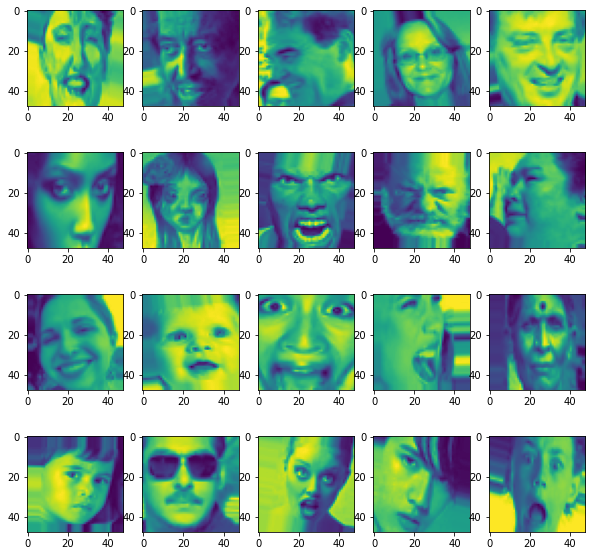

In [13]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show()

In [36]:
model = Sequential()

model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(Adam(learning_rate=0.0001,decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.fit(dataGen.flow(train_features,train_target,batch_size=20),epochs=50)

Epoch 1/100
1436/1436 [==============================] - 158s 110ms/step - loss: 1.8006 - accuracy: 0.2580
Epoch 2/100
1436/1436 [==============================] - 145s 101ms/step - loss: 1.7188 - accuracy: 0.3042
Epoch 3/100
1436/1436 [==============================] - 149s 103ms/step - loss: 1.6497 - accuracy: 0.3443
Epoch 4/100
1436/1436 [==============================] - 153s 107ms/step - loss: 1.5772 - accuracy: 0.3822
Epoch 5/100
1436/1436 [==============================] - 153s 107ms/step - loss: 1.5174 - accuracy: 0.4122
Epoch 6/100
1436/1436 [==============================] - 155s 108ms/step - loss: 1.4586 - accuracy: 0.4418
Epoch 7/100
1436/1436 [==============================] - 152s 106ms/step - loss: 1.4196 - accuracy: 0.4574
Epoch 8/100
1436/1436 [==============================] - 152s 106ms/step - loss: 1.3824 - accuracy: 0.4715
Epoch 9/100
1436/1436 [==============================] - 153s 106ms/step - loss: 1.3538 - accuracy: 0.4804
Epoch 10/100
1436/1436 [=============

Epoch 77/100
1436/1436 [==============================] - 172s 120ms/step - loss: 0.9196 - accuracy: 0.6539
Epoch 78/100
1436/1436 [==============================] - 172s 120ms/step - loss: 0.9110 - accuracy: 0.6596
Epoch 79/100
1436/1436 [==============================] - 171s 119ms/step - loss: 0.9112 - accuracy: 0.6594
Epoch 80/100
1436/1436 [==============================] - 171s 119ms/step - loss: 0.9103 - accuracy: 0.6607
Epoch 81/100
1436/1436 [==============================] - 171s 119ms/step - loss: 0.9057 - accuracy: 0.6621
Epoch 82/100
1436/1436 [==============================] - 176s 123ms/step - loss: 0.9015 - accuracy: 0.6630
Epoch 83/100
1436/1436 [==============================] - 199s 138ms/step - loss: 0.9024 - accuracy: 0.6635
Epoch 84/100
1436/1436 [==============================] - 304s 212ms/step - loss: 0.8974 - accuracy: 0.6657
Epoch 85/100
1436/1436 [==============================] - 319s 222ms/step - loss: 0.9015 - accuracy: 0.6620
Epoch 86/100
1436/1436 [====

In [17]:
ModelToJSON=model.to_json()

In [18]:
obj=open("D:/Datasets/EmotionModel.json","w")
obj.write(ModelToJSON)
obj.close()

In [19]:
model.save_weights("D:/Datasets/EmotionWeights.h5")

In [3]:
abc=open("D:/Datasets/EmotionModel.json","r")
loaded_data=abc.read()
model=model_from_json(loaded_data)
model.load_weights("D:/Datasets/EmotionWeights.h5")

In [ ]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,280)

In [ ]:
def getClassName(classNo):
    if classNo==0:return 'Happy'
    elif classNo==1:return 'Sad'
    elif classNo==2:return 'Angry'
    elif classNo==3:return 'Disgusted'
    elif classNo==4:return 'Fearful'
    elif classNo==5:return 'Neutral'
    elif classNo==6:return 'Surprised'

In [ ]:
while True:
    message,image=capt.read()
    if not message:break
    imagearr=np.asarray(image)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.25,3)
    for (x,y,w,h) in face:
        imagearr=imagearr[x:x+w,y:y+h]
        try:
            imagearr=cv2.resize(imagearr,(48,48))
        except:
            pass
        else:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
            imagearr=preprocessing(imagearr)
            imagearr=imagearr.reshape(1,48,48,1)
            predictions=model.predict(imagearr)
            NeuronIndex=model.predict_classes(imagearr)
            cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            probabilityValue=np.amax(predictions)
            if probabilityValue>=0.0:
                cv2.putText(image,getClassName(NeuronIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
                cv2.putText(image,str(int(probabilityValue*100))+"%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    AsciiValue=cv2.waitKey(1)
    if AsciiValue==ord('s'):
        cv2.destroyAllWindows()
        break

In [39]:
test_loss,test_acc=model.evaluate(test_features,test_target,verbose=2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [40]:
prediction=model.predict(test_features)

In [41]:
prediction[0]

array([9.9904674e-01, 5.3273391e-07, 8.9691266e-06, 1.4329301e-09,
       1.4191227e-05, 1.1372373e-04, 8.1596634e-04], dtype=float32)

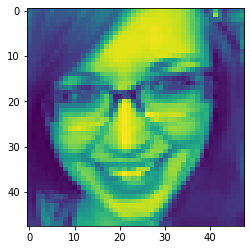

In [44]:
plt.imshow(test_features[0])
plt.show()

0.99904674
0.7946857
0.96376115
0.9766219
0.671417
0.7428388
0.9863247
0.9974154
0.99783283
0.94676536
0.7760192
0.9069932
0.9980849
0.9995073
0.97857136
0.7992119
0.9837061
0.9641951
0.80770534
0.9636364
0.9996387
0.99543804
0.9993787
0.62495786
0.9995683
0.93712145
0.8410162
0.9603931
0.51465243
0.9870914
0.6212736
0.44999984
0.8825727
0.77110034
0.954467
0.49956378
0.98432434
0.9778817
0.9765058
0.98686486
0.9918066
0.6203371
0.9984061
0.69167465
0.87538576
0.9674713
0.914768
0.9965848
0.98547804
0.9896959


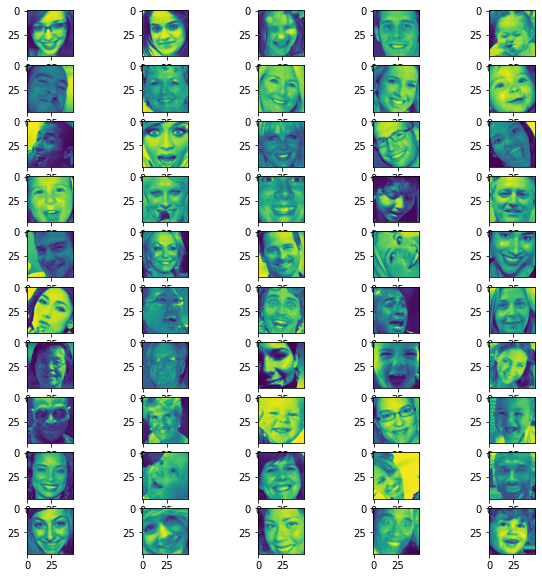

In [50]:
plt.figure(figsize=(10,10))
for i in range(50):
    print(np.amax(prediction[i]))
    plt.subplot(10,5,i+1)
    plt.imshow(test_features[i])
plt.show()